In [1]:
import os
import pandas as pd 
import numpy as py
import matplotlib as mpl    # for plotting
import matplotlib.pyplot as mpl # for plotting
import matplotlib.pyplot as plt 
import tensorflow as tf
import seaborn as sns
%matplotlib inline
sns.set()
plt.style.use('bmh')
from sklearn.feature_extraction.text import CountVectorizer

# packages for data cleaning function
import re
import string
import pickle


In [2]:
 os.path.join('Datasets','Codeswitched dataset.csv')

'Datasets\\Codeswitched dataset.csv'

## Loading a datas set raw_Codeswitched  dataset

In [3]:
df= pd.read_csv( os.path.join('Datasets','Codeswitched dataset.csv'))

In [4]:
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,1,1,2,2,kindly say bickering to kikuyus and kalenjins....
1,3,1,1,2,2,kindly remind them that we do not have thoroug...
2,3,1,1,2,2,kindly look at moses' statement. where has he ...
3,3,1,1,2,2,kindly like this page>>>wtf fun facts maasai a...
4,3,1,1,2,2,kindly kikuyus humble yourselves in 2022 and t...


In [ ]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['tweet'])

ax.set_title('Amount of Tweets Per Label',fontsize = 20)
ax.set_xlabel('Type of Tweet',fontsize = 15)
ax.set_ylabel('count',fontsize = 15)
ax.set_xticklabels(['offensive_language','hate_speech'],fontsize = 13)

total = float(len(df)) # one person per row 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total * 100) + '%',
            ha="center") 

In [57]:
try:
    x = input()
    print ('Try using KeyboardInterrupt')
except KeyboardInterrupt:
    print ('KeyboardInterrupt exception is caught')
else:
    print ('No exceptions are caught')


Try using KeyboardInterrupt
No exceptions are caught


In [ ]:
df['tweet'].sum() / len(df['tweet'])

In [7]:
df.iloc[1]['tweet']

'kindly remind them that we do not have thoroughbred kikuyus but rather a mix of'

In [8]:
df[df.columns[0:5]].iloc[1] 

count                 3
hate_speech           1
offensive_language    1
neither               2
class                 2
Name: 1, dtype: int64

In [9]:
df['class'].unique()

array([2, 1, 0], dtype=int64)

c:\Users\Ricky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Class')

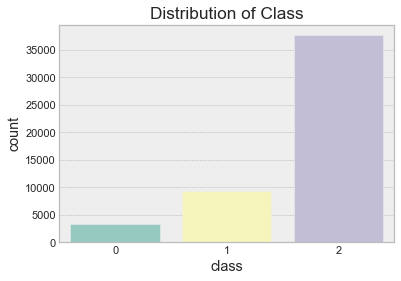

In [10]:
sns.countplot(df['class'], palette='Set3').set_title('Distribution of Class')

In [13]:
df['class'].sum() / len(df['class'])

1.686297957149975


###Preprocessing

In [12]:
from tensorflow.keras.layers import TextVectorization

In [69]:
TextVectorization 

keras.layers.preprocessing.text_vectorization.TextVectorization

In [70]:
x = df['tweet']
y = df[df.columns[0:5]].values

In [71]:
MAX_FEATURES = 200000 # maximum number of words to use(VOCABU.txt)

In [16]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES, output_sequence_length=1800, output_mode='int')

In [72]:
type(x.values)

numpy.ndarray

In [73]:
vectorizer.adapt(x.values)

In [74]:
vectorizer('Hello world, life is great')[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([4709,  302,  226,    7,  325], dtype=int64)>

In [75]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'are',
 'to',
 'and',
 'you',
 'is',
 'a',
 'of',
 'in',
 'we',
 'kikuyus',
 'this',
 'for',
 'all',
 'that',
 'i',
 'not',
 'they',
 'be',
 'have',
 'on',
 'with',
 'luos',
 'will',
 'it',
 'what',
 'who',
 'noreformsnoelections',
 'when',
 'why',
 'your',
 'but',
 'from',
 'nyakundi',
 'by',
 'kenya',
 'as',
 'he',
 'people',
 'their',
 'our',
 'like',
 'do',
 'at',
 'was',
 'just',
 'so',
 'hate',
 'us',
 'them',
 'can',
 'no',
 'dont',
 'has',
 'na',
 'uhuru',
 'should',
 'or',
 'if',
 'kalenjins',
 'one',
 'know',
 'kenyans',
 'rt',
 'its',
 'about',
 'only',
 'luolivesmatter',
 'now',
 'u',
 'my',
 'ni',
 'his',
 'luhyas',
 'raila',
 'up',
 'hawa',
 'kill',
 'those',
 'how',
 'out',
 'were',
 'electionsboycottke',
 'where',
 'maasai',
 'me',
 'ripmsando',
 'jubilee',
 'an',
 'other',
 'hatespeech',
 'time',
 'him',
 'there',
 'cant',
 'must',
 'masai',
 'being',
 'need',
 'very',
 'go',
 'more',
 'wembeniuleule',
 'even',
 'get',
 'never',
 'see',
 'want',

In [76]:
vectorizer_text = vectorizer(x.values)

In [77]:
vectorizer_text 

<tf.Tensor: shape=(50175, 1800), dtype=int64, numpy=
array([[  861,   116, 23464, ...,     0,     0,     0],
       [  861,  1884,    51, ...,     0,     0,     0],
       [  861,   261,    45, ...,     0,     0,     0],
       ...,
       [   13,     7,    31, ...,     0,     0,     0],
       [   13,     7,     2, ...,     0,     0,     0],
       [   13,     7,    18, ...,     0,     0,     0]], dtype=int64)>

In [78]:
#len(x)

Tensor Flow Pipeline

In [79]:
#MCSHBAP- Map, cache,shuffle, batch, prefetch from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorizer_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps prevent bottlenecks


In [80]:
dataset.as_numpy_iterator().next()

(array([[  24,    3,   70, ...,    0,    0,    0],
        [  46,   95,    8, ...,    0,    0,    0],
        [   6,    3,   72, ...,    0,    0,    0],
        ...,
        [  13,    7,   18, ...,    0,    0,    0],
        [ 465,  131,   20, ...,    0,    0,    0],
        [ 200,    7, 8953, ...,    0,    0,    0]], dtype=int64),
 array([[3, 1, 2, 0, 1],
        [3, 0, 0, 3, 2],
        [3, 0, 0, 3, 2],
        [3, 0, 0, 3, 2],
        [3, 0, 0, 3, 2],
        [3, 1, 2, 1, 1],
        [3, 0, 1, 2, 2],
        [3, 0, 2, 1, 1],
        [4, 1, 2, 1, 1],
        [3, 0, 2, 1, 1],
        [4, 0, 1, 3, 2],
        [3, 0, 2, 1, 1],
        [3, 0, 1, 2, 2],
        [3, 0, 2, 1, 1],
        [3, 0, 0, 3, 2],
        [3, 0, 0, 3, 2]], dtype=int64))

In [81]:
batch_x, batch_y = dataset.as_numpy_iterator().next()

In [26]:
batch_y.shape

(16, 5)

In [82]:
batch_x.shape

(16, 1800)

In [83]:
int(len(dataset)*.8)

2508

In [84]:
train = dataset.take(int(len(dataset) * 0.8))
val = dataset.skip(int(len(dataset) * 0.8)).take(int(len(dataset) * 0.2))
test = dataset.skip(int(len(dataset) * 0.8)).skip(int(len(dataset) * 0.1))   ##reconfirm  *0.2

In [85]:
len(train)

2508

In [86]:
len(val)

627

In [87]:
len(test)

315

In [88]:
train_generator = train.as_numpy_iterator()

In [89]:
train_generator.next()  # returns a tuple of (x, y) where x is a numpy array of shape (batch_size, sequence_length) and y is a numpy array of shape (batch_size, num_classes)
                        #You can use this to iterate over the training dataset and its always changing

(array([[16763,  1015,   134, ...,     0,     0,     0],
        [    6,  3131,  4836, ...,     0,     0,     0],
        [  776,  8539,  1442, ...,     0,     0,     0],
        ...,
        [   30,  4878,  7924, ...,     0,     0,     0],
        [  741,  1289, 29360, ...,     0,     0,     0],
        [ 2025,    16,     6, ...,     0,     0,     0]], dtype=int64),
 array([[3, 0, 0, 3, 2],
        [3, 0, 0, 3, 2],
        [3, 0, 2, 1, 1],
        [3, 1, 0, 2, 2],
        [3, 2, 1, 0, 0],
        [3, 0, 1, 2, 2],
        [3, 0, 2, 1, 1],
        [3, 0, 3, 0, 1],
        [3, 0, 0, 3, 2],
        [3, 1, 0, 2, 2],
        [3, 0, 0, 3, 2],
        [3, 0, 0, 3, 2],
        [3, 0, 1, 2, 2],
        [3, 0, 2, 1, 1],
        [3, 0, 0, 3, 2],
        [3, 0, 1, 2, 2]], dtype=int64))

In [90]:
x

0        kindly say bickering to kikuyus and kalenjins....
1        kindly remind them that we do not have thoroug...
2        kindly look at moses' statement. where has he ...
3        kindly like this page>>>wtf fun facts maasai a...
4        kindly kikuyus humble yourselves in 2022 and t...
                               ...                        
50170                        this issa plot to kill luhyas
50171    this is why i will not vote raila in luos are ...
50172    this is why i hate luos even the ones calling ...
50173    this is the biggest bullshit no hit bid agains...
50174    this is not breaking news kikuyus kill for pow...
Name: tweet, Length: 50175, dtype: object

In [91]:
y

array([[3, 1, 1, 2, 2],
       [3, 1, 1, 2, 2],
       [3, 1, 1, 2, 2],
       ...,
       [5, 3, 0, 2, 0],
       [4, 2, 0, 2, 0],
       [4, 3, 1, 0, 0]], dtype=int64)

In [92]:
df['tweet']

0        kindly say bickering to kikuyus and kalenjins....
1        kindly remind them that we do not have thoroug...
2        kindly look at moses' statement. where has he ...
3        kindly like this page>>>wtf fun facts maasai a...
4        kindly kikuyus humble yourselves in 2022 and t...
                               ...                        
50170                        this issa plot to kill luhyas
50171    this is why i will not vote raila in luos are ...
50172    this is why i hate luos even the ones calling ...
50173    this is the biggest bullshit no hit bid agains...
50174    this is not breaking news kikuyus kill for pow...
Name: tweet, Length: 50175, dtype: object

In [93]:
df[df.columns[0:5]].values

array([[3, 1, 1, 2, 2],
       [3, 1, 1, 2, 2],
       [3, 1, 1, 2, 2],
       ...,
       [5, 3, 0, 2, 0],
       [4, 2, 0, 2, 0],
       [4, 3, 1, 0, 0]], dtype=int64)

Creating the sequential Model

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional,Dense, Embedding

In [95]:
Bidirectional

keras.layers.rnn.bidirectional.Bidirectional

In [96]:
y.shape

(50175, 5)

In [97]:
y[0]

array([3, 1, 1, 2, 2], dtype=int64)

In [98]:
model = Sequential()
   #creating the embedding Layer
model.add(Embedding(MAX_FEATURES+1, 32))
    #Creating an LSTM 32 units tanh gpu for tensor flow : interptretaion for directional meaning of words in sentences
model.add(Bidirectional(LSTM(32, activation="tanh")))

        #Dense layers: Feature extractor fully connected layers
model.add(Dense(128, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))

            #Final Layer
model.add(Dense(6, activation="sigmoid"))




In [99]:

#not a categorical (binary) 
model.compile(loss="BinaryCrossentropy", optimizer="Adam")

In [103]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          6400032   
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 6)                 774       
                                                      

In [104]:
history = model.fit(train,epochs=1, validation_data=val)

ValueError: in user code:

    File "c:\Users\Ricky\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Ricky\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Ricky\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Ricky\anaconda3\lib\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\Ricky\anaconda3\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "c:\Users\Ricky\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\Ricky\anaconda3\lib\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\Ricky\anaconda3\lib\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\Ricky\anaconda3\lib\site-packages\keras\losses.py", line 1930, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "c:\Users\Ricky\anaconda3\lib\site-packages\keras\backend.py", line 5283, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)

    ValueError: `logits` and `labels` must have the same shape, received ((None, 6) vs (None, 5)).
